<a href="https://colab.research.google.com/github/soumyanildey/Machine-Learning-Projects/blob/main/Oral_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"soumyanildey","key":"16c8496d9077611a3aa47cb9b55a0481"}'}

In [5]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!rm kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d ashenafifasilkebede/dataset

Dataset URL: https://www.kaggle.com/datasets/ashenafifasilkebede/dataset
License(s): CC0-1.0
100% 2.92G/2.93G [00:32<00:00, 59.3MB/s]
100% 2.93G/2.93G [00:32<00:00, 95.7MB/s]


In [7]:
import os
os.listdir()

['.config', 'dataset.zip', 'drive', 'sample_data']

In [8]:
os.mkdir('Oral Cancer')

In [9]:
os.listdir()

['.config', 'dataset.zip', 'Oral Cancer', 'drive', 'sample_data']

In [10]:
import shutil
shutil.move('/content/dataset.zip','/content/Oral Cancer')

'/content/Oral Cancer/dataset.zip'

In [11]:
os.chdir('Oral Cancer')

In [12]:
os.listdir()

['dataset.zip']

In [13]:
!unzip -q dataset.zip

In [14]:
os.listdir()

['train', 'dataset.zip', 'test', 'val']

In [ ]:
import glob
images=glob.glob("/content/Oral Cancer/train/**/*.jpg")

In [ ]:
images

['/content/Oral Cancer/train/Normal/aug_204_6403.jpg',
 '/content/Oral Cancer/train/Normal/aug_194_8729.jpg',
 '/content/Oral Cancer/train/Normal/aug_138_1340.jpg',
 '/content/Oral Cancer/train/Normal/aug_26_2370.jpg',
 '/content/Oral Cancer/train/Normal/Normal_100x_86.jpg',
 '/content/Oral Cancer/train/Normal/aug_558_8773.jpg',
 '/content/Oral Cancer/train/Normal/aug_15_8222.jpg',
 '/content/Oral Cancer/train/Normal/Normal_400x_199.jpg',
 '/content/Oral Cancer/train/Normal/aug_155_5867.jpg',
 '/content/Oral Cancer/train/Normal/aug_370_9944.jpg',
 '/content/Oral Cancer/train/Normal/aug_362_6151.jpg',
 '/content/Oral Cancer/train/Normal/aug_72_1625.jpg',
 '/content/Oral Cancer/train/Normal/aug_187_2473.jpg',
 '/content/Oral Cancer/train/Normal/aug_101_8996.jpg',
 '/content/Oral Cancer/train/Normal/aug_464_1751.jpg',
 '/content/Oral Cancer/train/Normal/aug_119_6790.jpg',
 '/content/Oral Cancer/train/Normal/aug_496_7662.jpg',
 '/content/Oral Cancer/train/Normal/aug_127_5671.jpg',
 '/conte

In [ ]:
x=0
for i in images[0]:
  if i=='N':
    print(x)
  else:
    x=x+1

27


In [ ]:
Normal=[]
OSCC=[]
for i in images:
  if i[27]=='N':
    Normal.append(i)
  else:
    OSCC.append(i)

In [ ]:
len(Normal)

2435

In [ ]:
len(OSCC)

2511

In [ ]:
from keras.utils import load_img,img_to_array
from google.colab.patches import cv2_imshow

In [ ]:
img=load_img(Normal[0])
img=img_to_array(img)
img.shape

(224, 224, 3)

In [ ]:
X=[]
Y=[]
for i in Normal:
    X.append(i)
    Y.append('Normal')
for i in OSCC:
    X.append(i)
    Y.append('OSCC')


In [ ]:
len(Normal)+len(OSCC)

4946

In [ ]:
len(X),len(Y)

(4946, 4946)

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
train_df={"FileName":X,'Class':Y}
train_df=pd.DataFrame(train_df)

In [ ]:
train_df.head(10)

FileName   Class
0  /content/Oral Cancer/train/Normal/aug_204_6403...  Normal
1  /content/Oral Cancer/train/Normal/aug_194_8729...  Normal
2  /content/Oral Cancer/train/Normal/aug_138_1340...  Normal
3  /content/Oral Cancer/train/Normal/aug_26_2370.jpg  Normal
4  /content/Oral Cancer/train/Normal/Normal_100x_...  Normal
5  /content/Oral Cancer/train/Normal/aug_558_8773...  Normal
6  /content/Oral Cancer/train/Normal/aug_15_8222.jpg  Normal
7  /content/Oral Cancer/train/Normal/Normal_400x_...  Normal
8  /content/Oral Cancer/train/Normal/aug_155_5867...  Normal
9  /content/Oral Cancer/train/Normal/aug_370_9944...  Normal

In [ ]:
train_df=train_df.sample(frac=1)

In [ ]:
train_df.head(10)

FileName   Class
1866  /content/Oral Cancer/train/Normal/aug_219_253.jpg  Normal
4612    /content/Oral Cancer/train/OSCC/aug_57_8340.jpg    OSCC
1737  /content/Oral Cancer/train/Normal/aug_198_3126...  Normal
1872  /content/Oral Cancer/train/Normal/aug_176_2238...  Normal
1435  /content/Oral Cancer/train/Normal/Normal_400x_...  Normal
1409  /content/Oral Cancer/train/Normal/aug_373_9944...  Normal
1969  /content/Oral Cancer/train/Normal/aug_171_3965...  Normal
616   /content/Oral Cancer/train/Normal/aug_177_7279...  Normal
2425  /content/Oral Cancer/train/Normal/aug_58_1199.jpg  Normal
2690    /content/Oral Cancer/train/OSCC/aug_69_9560.jpg    OSCC

In [ ]:
images=glob.glob("/content/Oral Cancer/val/**/*.jpg")

In [ ]:
Normal=[]
OSCC=[]
for i in images:
  if i[25]=='N':
    Normal.append(i)
  else:
    OSCC.append(i)

In [ ]:
Normal
OSCC

['/content/Oral Cancer/val/OSCC/OSCC_400x_310.jpg',
 '/content/Oral Cancer/val/OSCC/OSCC_400x_485.jpg',
 '/content/Oral Cancer/val/OSCC/OSCC_100x_389.jpg',
 '/content/Oral Cancer/val/OSCC/OSCC_400x_119.jpg',
 '/content/Oral Cancer/val/OSCC/OSCC_100x_435.jpg',
 '/content/Oral Cancer/val/OSCC/OSCC_100x_232.jpg',
 '/content/Oral Cancer/val/OSCC/OSCC_400x_398.jpg',
 '/content/Oral Cancer/val/OSCC/OSCC_400x_455.jpg',
 '/content/Oral Cancer/val/OSCC/OSCC_100x_59.jpg',
 '/content/Oral Cancer/val/OSCC/OSCC_400x_258.jpg',
 '/content/Oral Cancer/val/OSCC/OSCC_400x_203.jpg',
 '/content/Oral Cancer/val/OSCC/OSCC_400x_8.jpg',
 '/content/Oral Cancer/val/OSCC/OSCC_100x_274.jpg',
 '/content/Oral Cancer/val/OSCC/OSCC_100x_353.jpg',
 '/content/Oral Cancer/val/OSCC/OSCC_100x_403.jpg',
 '/content/Oral Cancer/val/OSCC/OSCC_400x_346.jpg',
 '/content/Oral Cancer/val/OSCC/OSCC_100x_90.jpg',
 '/content/Oral Cancer/val/OSCC/OSCC_400x_389.jpg',
 '/content/Oral Cancer/val/OSCC/OSCC_100x_392.jpg',
 '/content/Oral 

In [ ]:
x=0
for i in images[0]:
  if i=='N':
    print(x)
  else:
    x=x+1

25
31


In [ ]:
val_X=[]
val_Y=[]
for i in Normal:
    val_X.append(i)
    val_Y.append('Normal')
for i in OSCC:
    val_X.append(i)
    val_Y.append('OSCC')


In [ ]:
len(val_X)

120

In [ ]:
val_df={"FileName":val_X,'Class':val_Y}
val_df=pd.DataFrame(val_df)
val_df=val_df.sample(frac=1)

In [ ]:
images=glob.glob("/content/Oral Cancer/test/**/*.jpg")

In [ ]:
images

['/content/Oral Cancer/test/Normal/Normal_400x_43.jpg',
 '/content/Oral Cancer/test/Normal/Normal_400x_105.jpg',
 '/content/Oral Cancer/test/Normal/Normal_400x_124.jpg',
 '/content/Oral Cancer/test/Normal/Normal_400x_149.jpg',
 '/content/Oral Cancer/test/Normal/Normal_400x_12.jpg',
 '/content/Oral Cancer/test/Normal/Normal_100x_41.jpg',
 '/content/Oral Cancer/test/Normal/Normal_100x_25.jpg',
 '/content/Oral Cancer/test/Normal/Normal_400x_88.jpg',
 '/content/Oral Cancer/test/Normal/Normal_400x_150.jpg',
 '/content/Oral Cancer/test/Normal/Normal_100x_22.jpg',
 '/content/Oral Cancer/test/Normal/Normal_400x_155.jpg',
 '/content/Oral Cancer/test/Normal/Normal_400x_122.jpg',
 '/content/Oral Cancer/test/Normal/Normal_400x_104.jpg',
 '/content/Oral Cancer/test/Normal/Normal_100x_83.jpg',
 '/content/Oral Cancer/test/Normal/Normal_100x_38.jpg',
 '/content/Oral Cancer/test/Normal/Normal_400x_119.jpg',
 '/content/Oral Cancer/test/Normal/Normal_100x_35.jpg',
 '/content/Oral Cancer/test/Normal/Norma

In [ ]:
len(images)

126

In [ ]:
x=0
for i in images[0]:
  if i=='N':
    print(x)
    break
  else:
    x=x+1

26


In [ ]:
Normal=[]
OSCC=[]
for i in images:
  if i[26]=='N':
    Normal.append(i)
  else:
    OSCC.append(i)

In [ ]:
test_X=[]
test_Y=[]
for i in Normal:
    test_X.append(i)
    test_Y.append('Normal')
for i in OSCC:
    test_X.append(i)
    test_Y.append('OSCC')


In [ ]:
Normal

['/content/Oral Cancer/test/Normal/Normal_400x_43.jpg',
 '/content/Oral Cancer/test/Normal/Normal_400x_105.jpg',
 '/content/Oral Cancer/test/Normal/Normal_400x_124.jpg',
 '/content/Oral Cancer/test/Normal/Normal_400x_149.jpg',
 '/content/Oral Cancer/test/Normal/Normal_400x_12.jpg',
 '/content/Oral Cancer/test/Normal/Normal_100x_41.jpg',
 '/content/Oral Cancer/test/Normal/Normal_100x_25.jpg',
 '/content/Oral Cancer/test/Normal/Normal_400x_88.jpg',
 '/content/Oral Cancer/test/Normal/Normal_400x_150.jpg',
 '/content/Oral Cancer/test/Normal/Normal_100x_22.jpg',
 '/content/Oral Cancer/test/Normal/Normal_400x_155.jpg',
 '/content/Oral Cancer/test/Normal/Normal_400x_122.jpg',
 '/content/Oral Cancer/test/Normal/Normal_400x_104.jpg',
 '/content/Oral Cancer/test/Normal/Normal_100x_83.jpg',
 '/content/Oral Cancer/test/Normal/Normal_100x_38.jpg',
 '/content/Oral Cancer/test/Normal/Normal_400x_119.jpg',
 '/content/Oral Cancer/test/Normal/Normal_100x_35.jpg',
 '/content/Oral Cancer/test/Normal/Norma

In [ ]:
test_df={"FileName":test_X,'Class':test_Y}
test_df=pd.DataFrame(test_df)
test_df=test_df.sample(frac=1)

In [ ]:
test_df['Class'].unique()

array(['OSCC', 'Normal'], dtype=object)

In [ ]:
'''from keras.applications import Xception
from keras.applications.xception import preprocess_input'''

'from keras.applications import Xception\nfrom keras.applications.xception import preprocess_input'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen={
    'train':ImageDataGenerator().flow_from_dataframe(train_df,x_col='FileName',y_col='Class',target_size=(224,224)),
    'valid':ImageDataGenerator().flow_from_dataframe(val_df,x_col='FileName',y_col='Class',target_size=(224,224)),
    'test':ImageDataGenerator().flow_from_dataframe(test_df,x_col='FileName',y_col='Class',target_size=(224,224))

}

Found 4946 validated image filenames belonging to 2 classes.
Found 120 validated image filenames belonging to 2 classes.
Found 126 validated image filenames belonging to 2 classes.


In [ ]:
'''model=Xception(include_top=True,weights=None,classes=1)
model.summary()'''

'model=Xception(include_top=True,weights=None,classes=1)\nmodel.summary()'

In [ ]:
traingen=datagen['train']
valgen=datagen['valid']
testgen=datagen['test']

In [ ]:
len(valgen)

4

In [ ]:
import tensorflow as tf
import keras
from keras import layers
from keras.layers import Dense,Conv2D,MaxPooling2D,AveragePooling2D,Flatten,Input
from keras.models import Sequential

In [ ]:
height,width=224,224
numclasses=2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model=keras.models.load_model('/content/drive/MyDrive/HYBRID/VGG+RESNET_NEW_BINARY')

In [ ]:
model.summary(line_length=170)

Model: "model"
__________________________________________________________________________________________________________________________________________________________________________
 Layer (type)                                      Output Shape                                       Param #         Connected to                                        
 input_1 (InputLayer)                              [(None, 224, 224, 3)]                              0               []                                                  
                                                                                                                                                                          
 conv1_pad (ZeroPadding2D)                         (None, 230, 230, 3)                                0               ['input_1[0][0]']                                   
                                                                                                                                  

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
batch_size=32
epochs=30
history=model.fit(traingen,validation_data=valgen,epochs=epochs,verbose=1)

Epoch 1/30
155/155 [==============================] - 148s 600ms/step - loss: 1.2899 - accuracy: 0.6935 - val_loss: 5.5341 - val_accuracy: 0.4583
Epoch 2/30
155/155 [==============================] - 75s 480ms/step - loss: 0.3416 - accuracy: 0.8534 - val_loss: 2.4392 - val_accuracy: 0.6167
Epoch 3/30
155/155 [==============================] - 75s 480ms/step - loss: 0.2802 - accuracy: 0.8852 - val_loss: 1.6376 - val_accuracy: 0.7167
Epoch 4/30
155/155 [==============================] - 75s 481ms/step - loss: 0.2170 - accuracy: 0.9127 - val_loss: 1.4445 - val_accuracy: 0.6167
Epoch 5/30
155/155 [==============================] - 75s 482ms/step - loss: 0.1991 - accuracy: 0.9203 - val_loss: 1.3791 - val_accuracy: 0.7583
Epoch 6/30
155/155 [==============================] - 75s 481ms/step - loss: 0.1830 - accuracy: 0.9321 - val_loss: 1.1957 - val_accuracy: 0.7583
Epoch 7/30
155/155 [==============================] - 75s 480ms/step - loss: 0.1495 - accuracy: 0.9430 - val_loss: 0.9600 - val_a

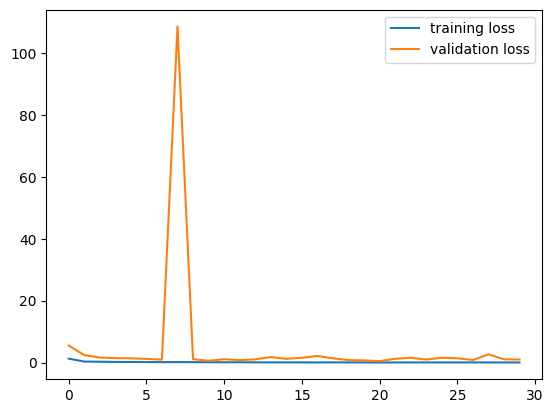

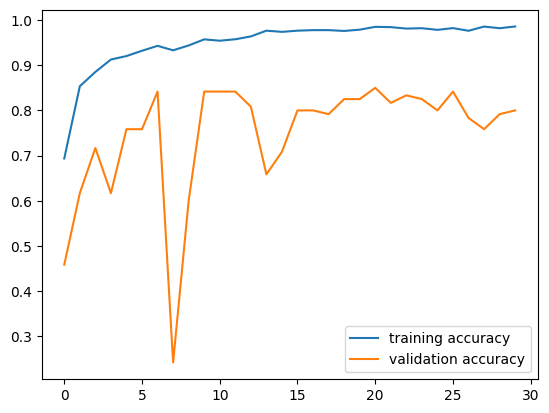

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"],label="training loss")
plt.plot(history.history["val_loss"],label="validation loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(history.history["accuracy"],label="training accuracy")
plt.plot(history.history["val_accuracy"],label="validation accuracy")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
model

In [ ]:
predictions=model.evaluate(testgen)

4/4 [==============================] - 11s 3s/step - loss: 0.4978 - accuracy: 0.8730


In [ ]:
print("Test Loss: %.2f"%predictions[0])
print("Test Accuracy: %.2f"%predictions[1])

Test Loss: 0.50
Test Accuracy: 0.87


In [ ]:
def show_images(gen):
    '''
    This function take the data generator and show sample of the images
    '''

    # return classes , images to be displayed
    g_dict = gen.class_indices        # defines dictionary {'class': index}
    classes = list(g_dict.keys())     # defines list of dictionary's kays (classes), classes names : string
    images, labels = next(gen)        # get a batch size samples from the generator

    # calculate number of displayed samples
    length = len(labels)        # length of batch size
    sample = min(length, 25)    # check if sample less than 25 images

    plt.figure(figsize= (20, 20))

    for i in range(sample):
        plt.subplot(5, 5, i + 1)
        image = images[i] / 255       # scales data to range (0 - 255)
        plt.imshow(image)
        index = np.argmax(labels[i])  # get image index
        class_name = classes[index]   # get class of image
        plt.title(class_name, color= 'blue', fontsize= 12)
        plt.axis('off')
    plt.show()

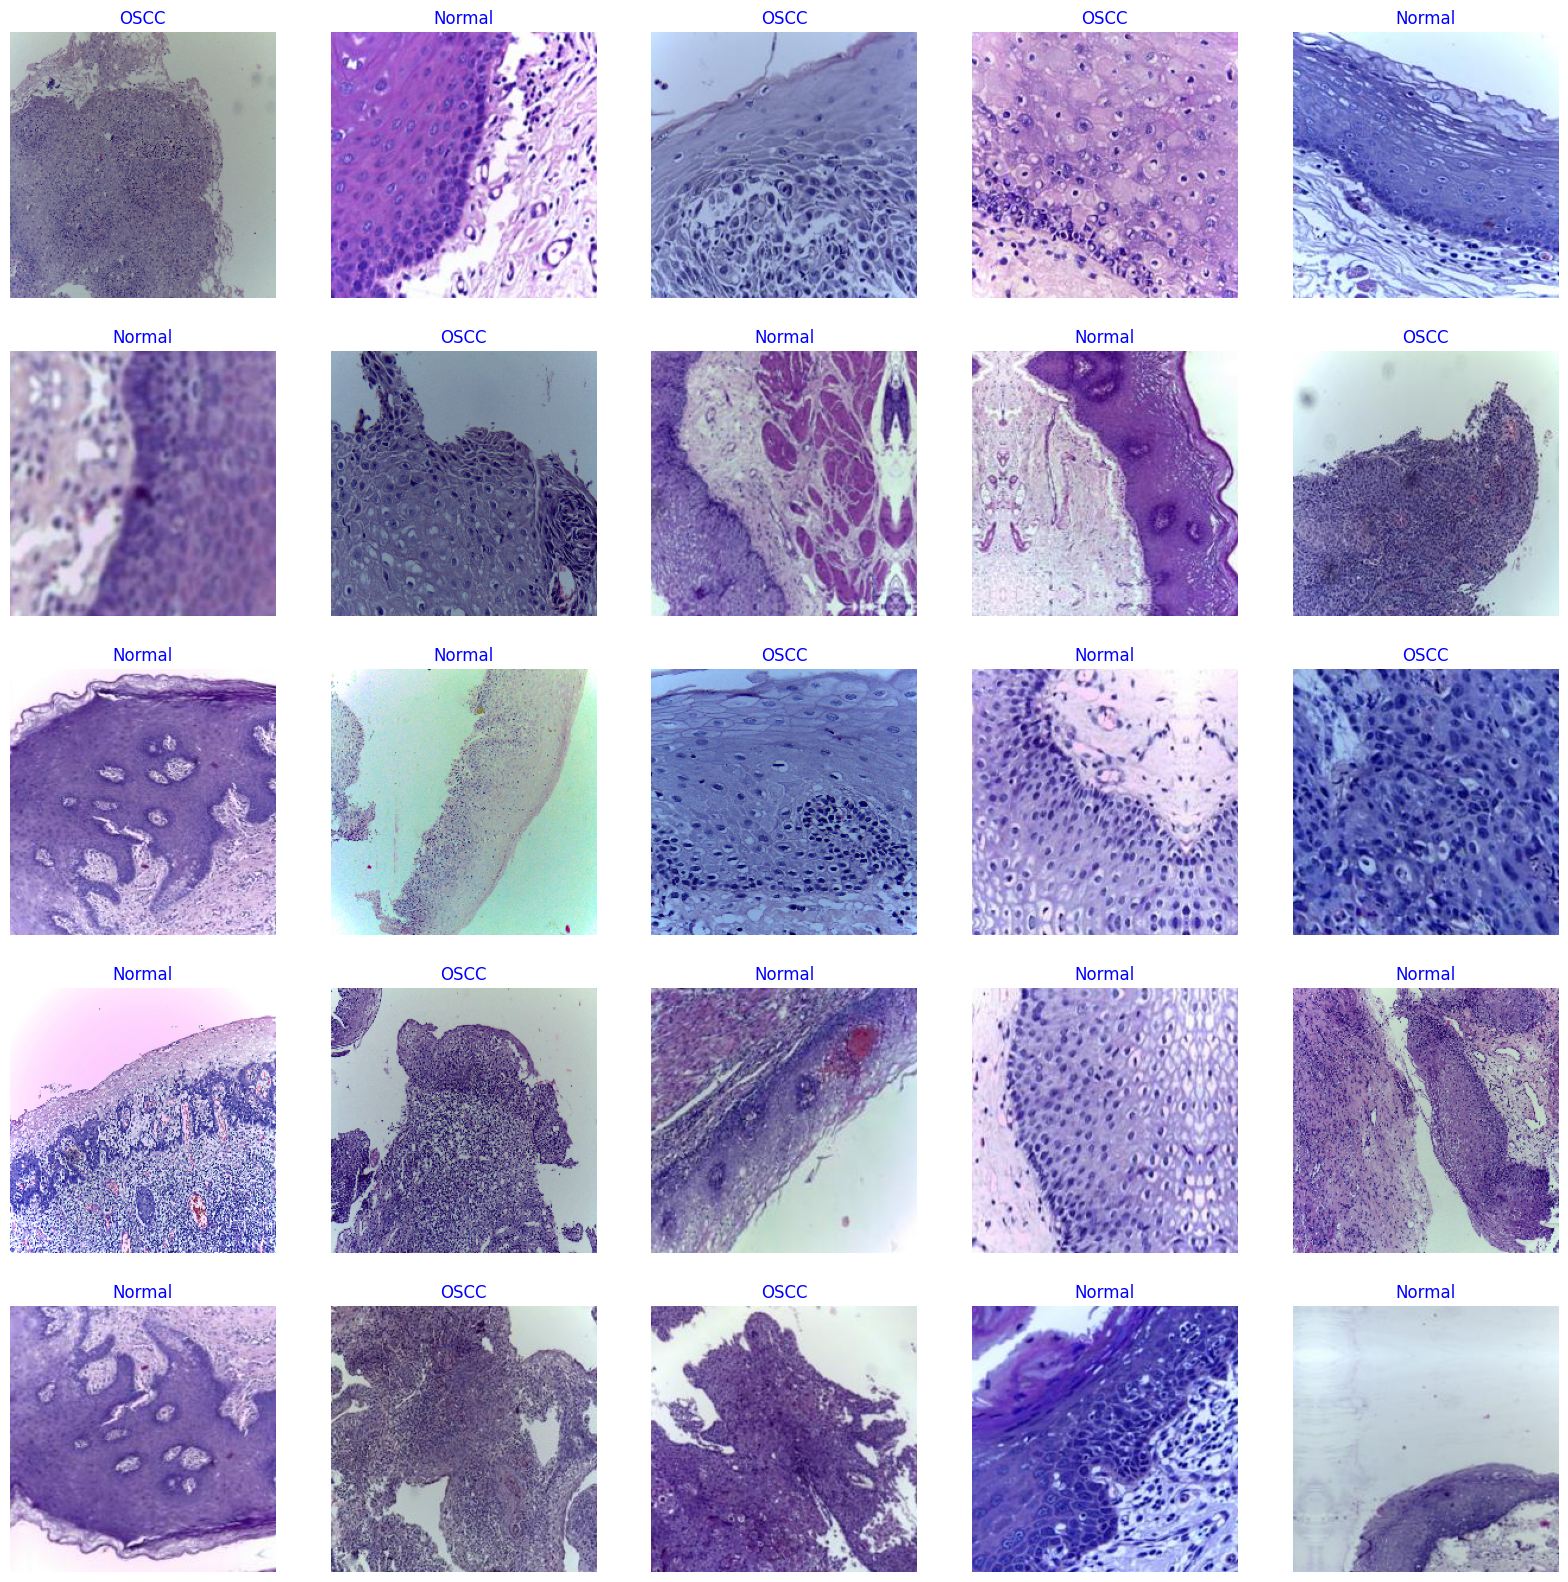

In [ ]:
show_images(traingen)

In [ ]:
model.save("/content/drive/MyDrive/ORAL/Oral.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
predictions=model.predict(testgen)

4/4 [==============================] - 7s 2s/step


In [ ]:
predictions=np.argmax(predictions,axis=1)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
enc=LabelEncoder()
test_labels=enc.fit_transform(test_df["Class"])

In [ ]:
test_labels

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1])

In [ ]:
f1=f1_score(test_labels,predictions,average='weighted')

In [ ]:
print(f1)

0.58334855681403


In [ ]:
print(classification_report(test_labels,predictions))

              precision    recall  f1-score   support

           0       0.19      0.23      0.21        31
           1       0.73      0.68      0.71        95

    accuracy                           0.57       126
   macro avg       0.46      0.46      0.46       126
weighted avg       0.60      0.57      0.58       126



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
cm=confusion_matrix(test_labels,predictions,labels=list(set(test_labels)))

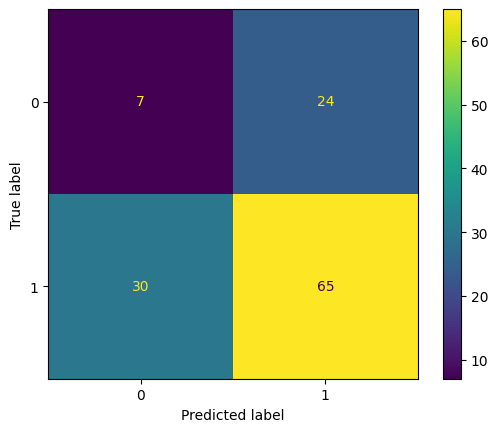

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=list(set(test_labels)))
disp.plot()
plt.show()

In [ ]:
keras.models.save_model(model,'/content/drive/MyDrive/HYBRID/Oral Cancer.h5')

<ipython-input-79-9a38fdcfc73e>:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  keras.models.save_model(model,'/content/drive/MyDrive/HYBRID/Oral Cancer.h5')


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import keras
model=keras.models.load_model('/content/drive/MyDrive/HYBRID//Oral Cancer.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Normal


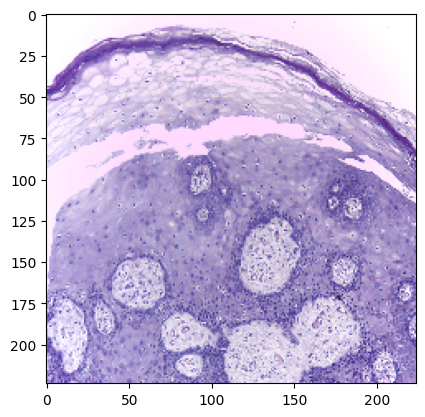

In [45]:
from keras.utils import load_img,img_to_array
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib.pyplot import imshow
img_loaded=load_img('/content/Oral Cancer/test/Normal/Normal_100x_12.jpg',target_size=(224,224))
img=img_to_array(img_loaded)
# img.reshape(224,224,3)
img = np.expand_dims(img, axis=0)
pred=np.argmax(model.predict(img),axis=1)
imshow(img_loaded)
if pred==0:
  print("Normal")
else:
  print("OSCC")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
OSCC


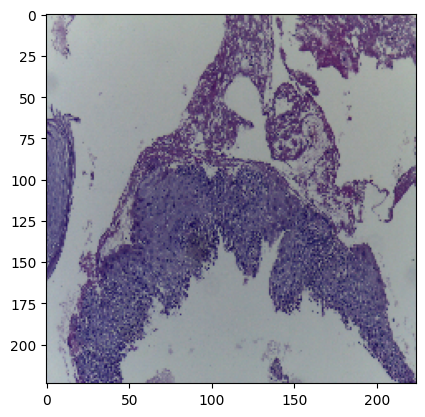

In [46]:
img_loaded=load_img('/content/Oral Cancer/test/OSCC/OSCC_100x_101.jpg',target_size=(224,224))
img=img_to_array(img_loaded)
# img.reshape(224,224,3)
img = np.expand_dims(img, axis=0)
pred=np.argmax(model.predict(img),axis=1)
imshow(img_loaded)
if pred==0:
  print("Normal")
else:
  print("OSCC")